In [1]:
# 1️⃣ Import
import pandas as pd
import numpy as np

# 2️⃣ Load dataset
data = pd.read_csv('..\\data\\combined.csv')

# 3️⃣ Basic info
print("\n📋 Basic Info:")
print(data.info())

# 4️⃣ First few rows
print("\n🔍 Sample Data:")
print(data.head(5))

# 5️⃣ Shape and missing values
print("\n🧩 Shape of data:", data.shape)
print("\n🚨 Missing Values:")
print(data.isnull().sum().sort_values(ascending=False).head(15))

# 6️⃣ Basic statistics
print("\n📊 Descriptive Statistics (Numerical Columns):")
print(data.describe().T)

# 7️⃣ Categorical overview
cat_cols = data.select_dtypes(include=['object']).columns
print("\n🏷️ Categorical Columns:", list(cat_cols))
for c in cat_cols:
    print(f"\n▶️ {c} — unique values:", data[c].nunique())

# 8️⃣ Correlation (for numeric relationships)
print("\n🔗 Correlation Matrix (Top correlated with Total_Exp):")
corr = data.corr(numeric_only=True)
if 'Total_Exp' in corr.columns:
    print(corr['Total_Exp'].sort_values(ascending=False).head(15))

# 9️⃣ Budget Overrun Basic Check
if 'Total_Exp' in data.columns and 'Approved_Labour_Budget' in data.columns:
    data['Budget_Diff'] = data['Total_Exp'] - data['Approved_Labour_Budget']
    print("\n💰 Budget Difference Summary:")
    print(data['Budget_Diff'].describe())

    # Optional: quick percent overrun view
    data['Budget_Overrun_Percent'] = data['Budget_Diff'] / data['Approved_Labour_Budget']
    print("\n📈 Budget Overrun % Summary:")
    print(data['Budget_Overrun_Percent'].describe())



📋 Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9612 entries, 0 to 9611
Data columns (total 36 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   fin_year                                               9612 non-null   object 
 1   month                                                  9612 non-null   object 
 2   state_code                                             9612 non-null   int64  
 3   state_name                                             9612 non-null   object 
 4   district_code                                          9612 non-null   int64  
 5   district_name                                          9612 non-null   object 
 6   Approved_Labour_Budget                                 9612 non-null   int64  
 7   Average_Wage_rate_per_day_per_person                   9612 non-null   float64
 8   Average_days_of_employment_provid

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1️⃣ Load data
data = pd.read_csv('..\\data\\combined.csv')


# 2️⃣ Relevant columns
cols = ['Approved_Labour_Budget', 'Total_Exp', 'state_name', 'district_name',
        'Total_Individuals_Worked', 'Total_Adm_Expenditure']
df = data[cols].copy()

# 3️⃣ Encode categorical columns
le_state = LabelEncoder()
le_district = LabelEncoder()
df['state_name'] = le_state.fit_transform(df['state_name'])
df['district_name'] = le_district.fit_transform(df['district_name'])

# 4️⃣ Create target variables

# (a) High Productivity
df['Productivity'] = df['Total_Individuals_Worked'] / df['Total_Exp']
median_prod = df['Productivity'].median()
df['High_Productivity'] = (df['Productivity'] > median_prod).astype(int)

# (b) High Admin Spending
df['Admin_Cost_Ratio'] = df['Total_Adm_Expenditure'] / df['Total_Exp']
df['High_Admin_Spending'] = (df['Admin_Cost_Ratio'] > 0.15).astype(int)

# 5️⃣ Feature columns
features = ['Approved_Labour_Budget', 'Total_Exp', 'state_name', 'district_name']

# 6️⃣ Targets to keep
targets = ['High_Productivity', 'High_Admin_Spending']

# 7️⃣ Train and evaluate Decision Tree for each target
for target in targets:
    print(f"\n\n================ Decision Tree for Target: {target} ================")
    
    X = df[features]
    y = df[target]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
    
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=5, random_state=42)
    clf.fit(X_train, y_train)
    
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)
    
    print("Training Accuracy:", round(accuracy_score(y_train, y_pred_train)*100,2), "%")
    print("Testing Accuracy :", round(accuracy_score(y_test, y_pred_test)*100,2), "%")
    
    print("\nClassification Report (Test Data):")
    print(classification_report(y_test, y_pred_test))
    
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred_test))
    
    feat_imp = pd.DataFrame({'Feature': features, 'Importance': clf.feature_importances_}).sort_values(by='Importance', ascending=False)
    print("\nFeature Importance:")
    print(feat_imp)




================ Decision Tree for Target: High_Productivity ================
Training Accuracy: 89.43 %
Testing Accuracy : 89.18 %

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.87      0.92      0.89      1202
           1       0.92      0.86      0.89      1201

    accuracy                           0.89      2403
   macro avg       0.89      0.89      0.89      2403
weighted avg       0.89      0.89      0.89      2403


Confusion Matrix:
[[1108   94]
 [ 166 1035]]

Feature Importance:
                  Feature  Importance
1               Total_Exp    0.610998
3           district_name    0.291349
0  Approved_Labour_Budget    0.097653
2              state_name    0.000000


================ Decision Tree for Target: High_Admin_Spending ================
Training Accuracy: 98.89 %
Testing Accuracy : 98.75 %

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       

In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1️⃣ Load data
data = pd.read_csv('..\\data\\combined.csv')

# 2️⃣ Encode categorical columns
le_district = LabelEncoder()
le_month = LabelEncoder()
data['district_name'] = le_district.fit_transform(data['district_name'])
data['month'] = le_month.fit_transform(data['month'])

# 3️⃣ Create target variables
data['Productivity'] = data['Total_Individuals_Worked'] / data['Total_Exp']
median_prod = data['Productivity'].median()
data['High_Productivity'] = (data['Productivity'] > median_prod).astype(int)

data['Admin_Cost_Ratio'] = data['Total_Adm_Expenditure'] / data['Total_Exp']
data['High_Admin_Spending'] = (data['Admin_Cost_Ratio'] > 0.15).astype(int)

# 4️⃣ Features after pruning
features_dict = {
    'High_Productivity': [
        'Material_and_skilled_Wages',
        'Average_days_of_employment_provided_per_Household',
        'Average_Wage_rate_per_day_per_person',
        'district_name',
        'Total_Households_Worked',
        'percent_of_Expenditure_on_Agriculture_Allied_Works',
        'month'
    ],
    'High_Admin_Spending': [
        'Persondays_of_Central_Liability_so_far',
        'percent_of_Expenditure_on_Agriculture_Allied_Works',
        'month',
        'Material_and_skilled_Wages',
        'Average_days_of_employment_provided_per_Household',
        'Number_of_Ongoing_Works'
    ]
}

# 5️⃣ Train and evaluate Decision Tree for each target
for target, features in features_dict.items():
    print(f"\n\n================ Decision Tree for Target: {target} ================")
    
    X = data[features]
    y = data[target]
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state=42, stratify=y
    )
    
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=10, random_state=42)
    clf.fit(X_train, y_train)
    
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)
    
    print("Training Accuracy:", round(accuracy_score(y_train, y_pred_train)*100,2), "%")
    print("Testing Accuracy :", round(accuracy_score(y_test, y_pred_test)*100,2), "%")
    
    print("\nClassification Report (Test Data):")
    print(classification_report(y_test, y_pred_test))
    
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred_test))
    
    feat_imp = pd.DataFrame({'Feature': features, 'Importance': clf.feature_importances_}).sort_values(by='Importance', ascending=False)
    print("\nFeature Importance:")
    print(feat_imp)




================ Decision Tree for Target: High_Productivity ================
Training Accuracy: 96.24 %
Testing Accuracy : 95.84 %

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1202
           1       0.97      0.95      0.96      1201

    accuracy                           0.96      2403
   macro avg       0.96      0.96      0.96      2403
weighted avg       0.96      0.96      0.96      2403


Confusion Matrix:
[[1163   39]
 [  61 1140]]

Feature Importance:
                                             Feature  Importance
0                         Material_and_skilled_Wages    0.544672
1  Average_days_of_employment_provided_per_Household    0.208087
2               Average_Wage_rate_per_day_per_person    0.140166
5  percent_of_Expenditure_on_Agriculture_Allied_W...    0.037095
3                                      district_name    0.035851
4                            Total_Households_

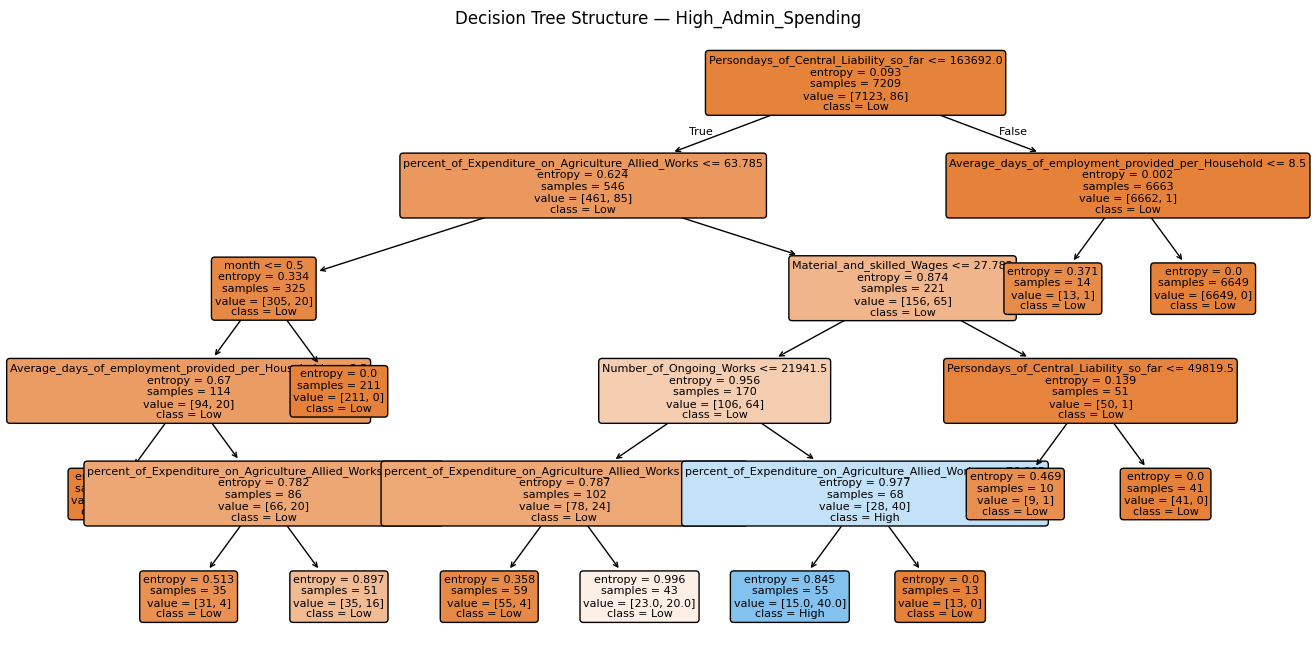

In [4]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))
tree.plot_tree(clf, feature_names=features, class_names=['Low', 'High'], 
               filled=True, rounded=True, fontsize=8)
plt.title(f"Decision Tree Structure — {target}")
plt.show()


# Districts with higher agricultural work percentage and moderate wage rates tend to achieve high productivity.

## insight you gain: By training a Decision Tree, you can find what factors (like wage rate, agriculture expenditure %, etc.) drive higher productivity.

| Target                  | What it tells us                           | What we can do with it                             |
| ----------------------- | ------------------------------------------ | -------------------------------------------------- |
| **High_Productivity**   | Which factors lead to efficient fund usage | Replicate successful district patterns elsewhere   |
| **High_Admin_Spending** | Where admin inefficiencies occur           | Target those districts for audit or reform         |
| **Feature Importance**  | Which inputs drive the outcome             | Helps prioritize data collection and interventions |
